In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [12]:
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x +c

In [20]:
def check_initial_values(f,x_min,x_max, tol):
    #check our initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    if(y_min*y_max>=0.0):
        print("No zero crossing found in the range =",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    if(np.fabs(y_min)<tol):
        return 1
    
    if(np.fabs(y_max)<tol):
        return 2
    
    return 3

In [21]:
def bisection_root_finding(f, x_min_start,x_max_start, tol):
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    imax = 10000
    i = 0
    
    flag = check_initial_values(f,x_min,x_max, tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    flag = 1 

    while(flag):
        x_mid = 0.5*(x_min+x_max)
        y_mid = f(x_mid)

        if(np.fabs(y_mid)<tol):
            flag = 0
        else:



            if(f(x_min)*f(x_mid)>0):
                x_min = x_mid
            else: 
                x_max = x_mid

    print(x_min,f(x_min),x_max,f(x_max))

    i+=1

    if(i>=imax):
        print("Exceeded max number of iterations = ",i)
        s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
        print(s)
        s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
        print(s)
        s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
        print(s)
        raise StopIteration('Stopping iterations after',i)
    
    return x_mid

In [22]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)

0.0 2.07
1.5 -0.2175000000000007
1.040863037109375 6.1878282573424315e-06 1.0408744812011719 -4.540379595852073e-06
Root found with y(1.040869) = 0.000001


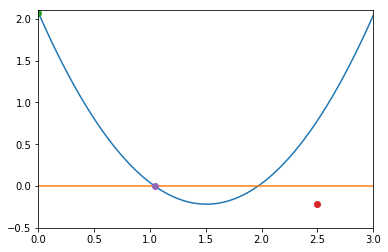

In [17]:
x = np.linspace(0,3,1000)
y = 1.01*x**2 - 3.04 *x +2.07
z = 0 *x 
plt.xlim(0,3)
plt.ylim(-.5,2.1)
plt.plot(x,y)
plt.plot(x,z)
plt.plot([1.040863037109375],[1.01*1.040869**2 - 3.04 *1.040869 +2.07],'o')
plt.show()